<a href="https://colab.research.google.com/github/seawavve/CNN_wavve/blob/main/OCR/tesseract_eng_kor_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pillow
! pip install pytesseract
! apt-get install tesseract-ocr-kor

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13953 sha256=865342305956c024606200a8461411fd932f8b3e99da5bcb47c7b642c10dc556
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-kor tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 5,845 kB of archives.
After this operation, 17.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e0

In [2]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow

# 한글 OCR

리 같이 걸어요 이 거리를

간,
오는 자장노래 어떤가요, 오예

1

뜨
을
때 10

1오 00
>, 3뽀
고 또
비
! 보
= 우
[0모
때 !문
비비
ㅇㅇ

뚜

| 거리를 우우 둘0
리며 흘날리는 꽃 잎이

즈츠

| 거리를 우우 둘이 걸어요, 오예

0 0 00 0
또 고

보뽀보뽀
버

ㅇ 0

어이
ㅇㅎ

질

고

2

대여 우리 이제 손 잡아요 이 거리에
마침 들려오는 사랑 노래 어떤가요, 오예



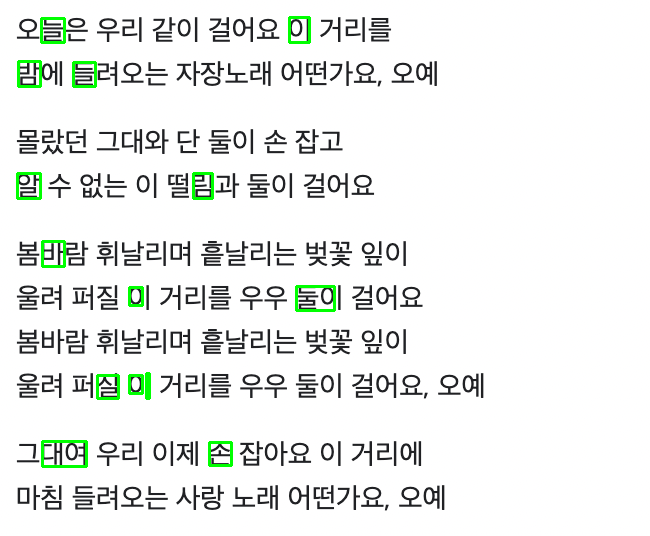

In [4]:
from pytesseract import Output
image = cv2.imread('./sample4.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#pytesseract에서는 numpy array를 읽지 못하고 file을 읽기 때문에 os로 파일을 불러들여야 한다.
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)
text = pytesseract.image_to_string(Image.open(filename), lang = "kor")
os.remove(filename)
print(text)

d = pytesseract.image_to_data(image, output_type=Output.DICT)
#print(d.keys())
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)

# 영어 OCR

The Lord’s Prayer

Our Father in heaven,
Hallowed be your name.
Your kingdom come.
Your will be done,
on earth as it is in heaven.
Give us this day our daily bread.
And forgive us our debts,
as we also have forgiven our debtors.
And do not bring us to the time of trial,
but rescue us from the evil one.
For the Thine is the kingdom,
The power, and the glory,
For ever and ever.
Amen



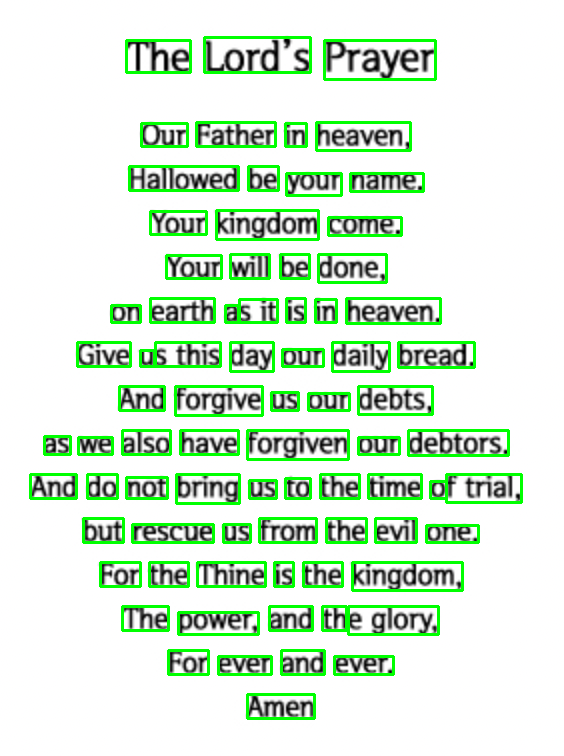

In [5]:
from pytesseract import Output
image = cv2.imread('./sample5.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#pytesseract에서는 numpy array를 읽지 못하고 file을 읽기 때문에 os로 파일을 불러들여야 한다.
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)
text = pytesseract.image_to_string(Image.open(filename), lang = "eng")
os.remove(filename)
print(text)

d = pytesseract.image_to_data(image, output_type=Output.DICT)
#print(d.keys())
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)